In [1]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import rioxarray as rx
import xarray as xr
import seaborn as sns
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = ['Times New Roman + SimSun + Nowar Sans GB18030', ]  # 设置字体 simhei, Heiti TC
font_name = "Times New Roman + SimSun + Nowar Sans GB18030"

In [3]:
import os
os.chdir(r"/Volumes/2TMyRes/SynologyDrive/SCI/BeijingHeatExposure")

In [4]:
tif_path = './'

In [5]:
sts_co = pd.read_excel('./气象数据/中国地面气象数据-站点信息.xlsx')

In [6]:
sts_co

Station_Id_C Station_Name Province     City     Cnty    Lat     Lon
0            50136           漠河     黑龙江省    大兴安岭市      漠河县  52.97  122.52
1            50137          北极村     黑龙江省    大兴安岭市      漠河县  53.47  122.37
2            50246           塔河     黑龙江省    大兴安岭市      塔河县  52.35  124.72
3            50247           呼中     黑龙江省    大兴安岭市      呼玛县  52.03  123.57
4            50349           新林     黑龙江省    大兴安岭市      呼玛县  51.70  124.33
...            ...          ...      ...      ...      ...    ...     ...
2159         59855           琼海      海南省      琼海市      琼海市  19.23  110.47
2160         59856           文昌      海南省      文昌市      文昌市  19.62  110.75
2161         59941          五指山      海南省     五指山市     五指山市  18.77  109.52
2162         59945           保亭      海南省  保亭黎族自治县  保亭黎族自治县  18.65  109.70
2163         59951           万宁      海南省      万宁市      万宁市  18.80  110.33

[2164 rows x 7 columns]

In [7]:
gs = gpd.points_from_xy(sts_co['Lon'], sts_co['Lat'])
stsg = gpd.GeoDataFrame(sts_co,geometry=gs,crs="EPSG:4326")
# stsg = stsg.to_crs(3857)
# stsg['geometry'] = stsg['geometry'].buffer(5)
# stsg = stsg.to_crs(4326)

In [8]:
# stsg.explore()

In [9]:
stsg.to_file('./气象数据/中国地面气象数据-站点信息.geojson')

In [10]:
minx, miny, maxx, maxy = 114.93628043922422, 38.76578863831628, 117.45818289488443, 40.36603871243918

region = stsg.query(f"Lon > {minx} and Lon < {maxx} and Lat > {miny} and Lat < {maxy}")
region

Station_Id_C Station_Name Province City     Cnty    Lat     Lon  \
300         53596           顺平      河北省  保定市      顺平县  38.85  115.13   
636         54398           顺义      北京市  北京市      顺义区  40.13  116.62   
637         54399           海淀      北京市  北京市      海淀区  39.98  116.28   
648         54424           平谷      北京市  北京市      平谷区  40.17  117.12   
650         54428        蓟县气象站      天津市  天津市       蓟县  40.03  117.40   
653         54431           通州      北京市  北京市      通州区  39.92  116.63   
655         54433           朝阳      北京市  北京市      朝阳区  39.95  116.50   
676         54499           昌平      北京市  北京市      昌平区  40.22  116.22   
677         54501           斋堂      北京市  北京市     门头沟区  39.97  115.68   
678         54502           涿州      河北省  保定市      涿州市  39.48  116.03   
679         54503           容城      河北省  保定市      容城县  39.07  115.82   
680         54505          门头沟      北京市  北京市     门头沟区  39.92  116.12   
681         54506          高碑店      河北省  保定市     高碑店市  39.32  115.95   
682         54507           易县      河北省  保定市       易县  39.33  115.52   
683         54510           大厂      河北省  廊坊市  大厂回族自治县  39.92  116.95   
684         54511           北京      北京市  北京市      大兴区  39.80  116.47   
685         54512           固安      河北省  廊坊市      固安县  39.42  116.28   
686         54513          石景山      北京市  北京市     石景山区  39.95  116.20   
687         54514           丰台      北京市  北京市      丰台区  39.87  116.25   
688         54515           廊坊      河北省  廊坊市      安次区  39.50  116.70   
689         54518           霸州      河北省  廊坊市      霸州市  39.12  116.40   
690         54519           永清      河北省  廊坊市      永清县  39.30  116.48   
691         54520           三河      河北省  廊坊市      三河市  39.97  117.08   
692         54521           香河      河北省  廊坊市      香河县  39.77  116.98   
694         54523       武清区气象站      天津市  天津市      武清区  39.38  117.02   
695         54525       宝坻区气象站      天津市  天津市      宝坻区  39.73  117.28   
696         54526       东丽区气象站      天津市  天津市      东丽区  39.08  117.33   
697         54527        天津气象站      天津市  天津市      西青区  39.08  117.05   
698         54528       北辰区气象站      天津市  天津市      北辰区  39.23  117.13   
717         54594           大兴      北京市  北京市      大兴区  39.72  116.35   
718         54596           房山      北京市  北京市      房山区  39.68  116.13   
719         54597          霞云岭      北京市  北京市      房山区  39.73  115.73   
720         54601           徐水      河北省  保定市      徐水县  38.98  115.65   
724         54605           安新      河北省  保定市      安新县  38.93  115.93   
730         54611           满城      河北省  保定市      满城县  38.93  115.32   
731         54612           文安      河北省  廊坊市      文安县  38.85  116.45   
738         54619       静海县气象站      天津市  天津市      静海县  38.92  116.92   
741         54622       津南区气象站      天津市  天津市      津南区  38.98  117.37   
750         54636           雄县      河北省  保定市       雄县  39.02  116.10   

                 geometry  
300  POINT (115.13 38.85)  
636  POINT (116.62 40.13)  
637  POINT (116.28 39.98)  
648  POINT (117.12 40.17)  
650   POINT (117.4 40.03)  
653  POINT (116.63 39.92)  
655   POINT (116.5 39.95)  
676  POINT (116.22 40.22)  
677  POINT (115.68 39.97)  
678  POINT (116.03 39.48)  
679  POINT (115.82 39.07)  
680  POINT (116.12 39.92)  
681  POINT (115.95 39.32)  
682  POINT (115.52 39.33)  
683  POINT (116.95 39.92)  
684   POINT (116.47 39.8)  
685  POINT (116.28 39.42)  
686   POINT (116.2 39.95)  
687  POINT (116.25 39.87)  
688    POINT (116.7 39.5)  
689   POINT (116.4 39.12)  
690   POINT (116.48 39.3)  
691  POINT (117.08 39.97)  
692  POINT (116.98 39.77)  
694  POINT (117.02 39.38)  
695  POINT (117.28 39.73)  
696  POINT (117.33 39.08)  
697  POINT (117.05 39.08)  
698  POINT (117.13 39.23)  
717  POINT (116.35 39.72)  
718  POINT (116.13 39.68)  
719  POINT (115.73 39.73)  
720  POINT (115.65 38.98)  
724  POINT (115.93 38.93)  
730  POINT (115.32 38.93)  
731  POINT (116.45 38.85)  
738  POINT (116.92 38.92)  
741  POINT (117.37 38.98)  
750   POINT (116.1 39.02)

In [11]:
# region.explore()

In [12]:
len(region)

39

In [23]:
import northarrow_new
import contextily as cx

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle

In [26]:
study_area = './边界数据/研究区/五环.shp'
study_area = gpd.read_file(study_area)

In [29]:
bj_county = gpd.read_file('./边界数据/beijing-county.geojson')
bj_city = gpd.read_file('./边界数据/beijing-city.geojson')

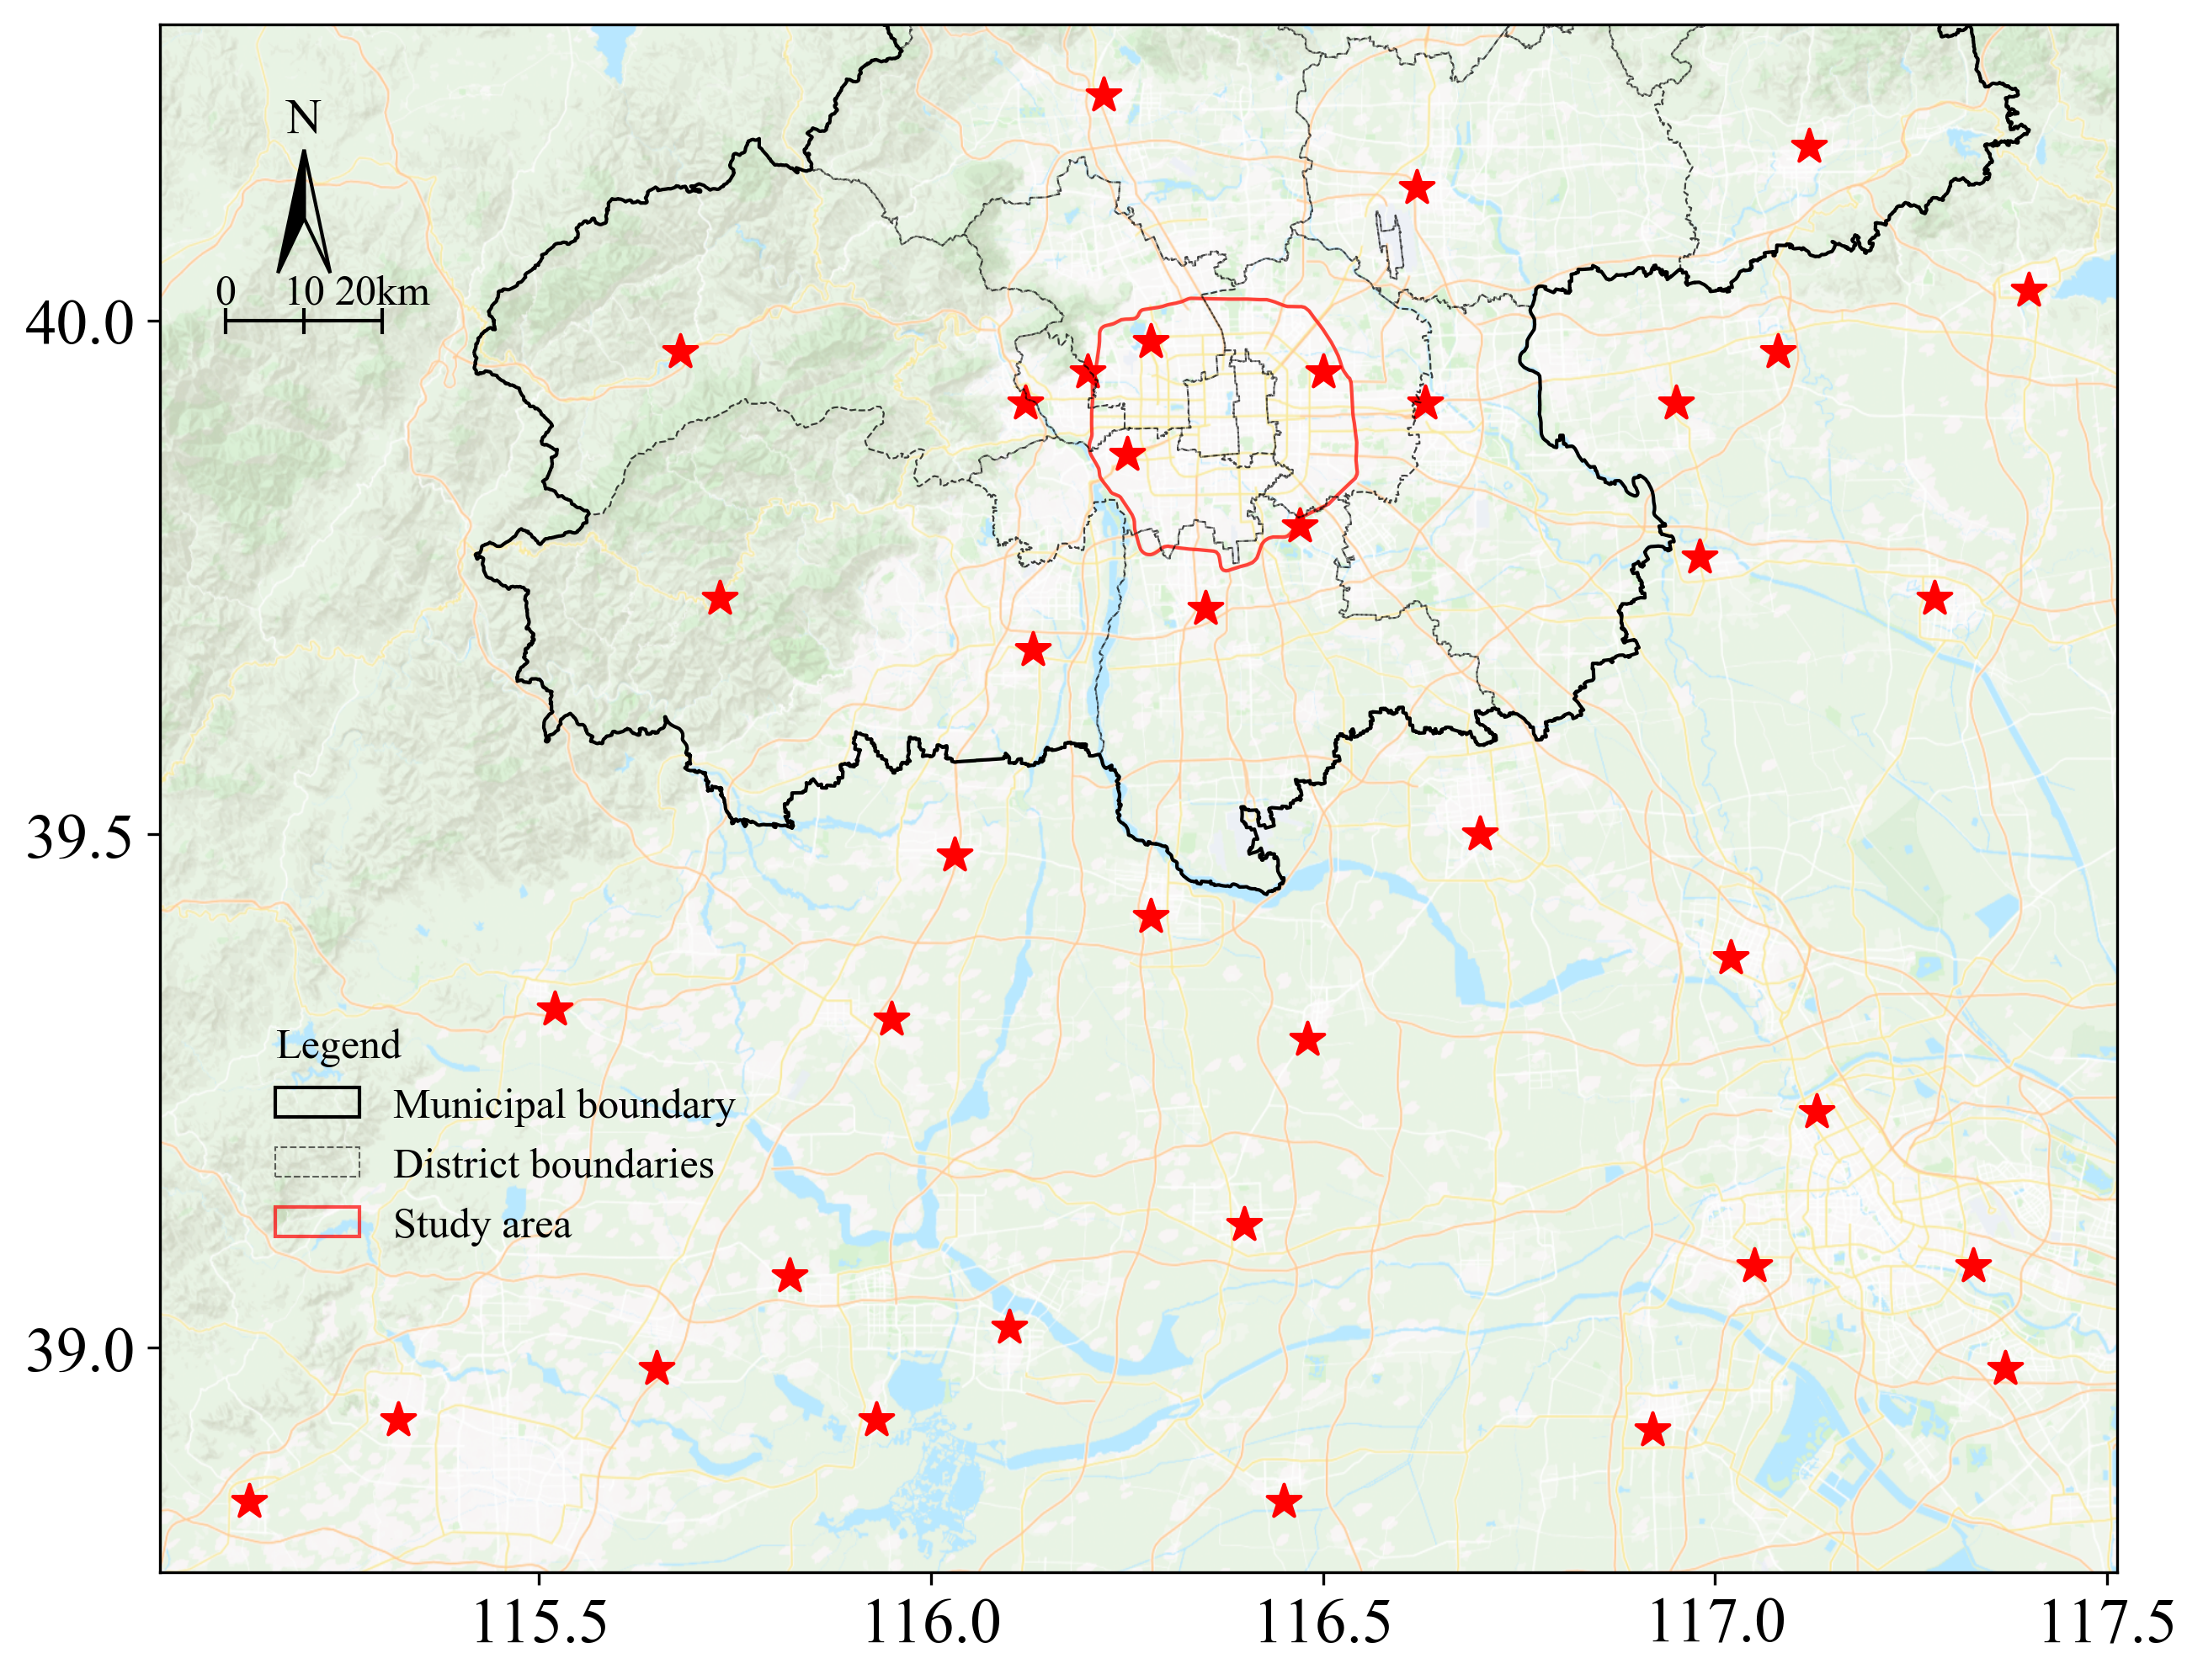

In [51]:
fig, ax = plt.subplots()
region.plot(ax=ax, marker='*', markersize=100, color='r')
cx.add_basemap(ax, crs=region.crs,alpha=0.7,
                  source=cx.providers.MapBox.Streets,zorder=0)
northarrow_new.add_scalebar_geo(gdf_geo=region, length=10000, lng=115.1, lat=40., ax=ax,
                                sub=8, divd=6, )
ax.yaxis.set_major_locator(mticker.MultipleLocator(.5))
ax.xaxis.set_major_locator(mticker.MultipleLocator(.5))
ax.tick_params(axis='both', labelsize=18)  # 设置 X 轴刻度标签的字体大小为 14 点

lw = 1
alpha = 0.7
study_area.plot(ax=ax,facecolor='none', edgecolor='r', alpha=alpha, lw=lw)
bj_county.plot(ax=ax,facecolor='none', edgecolor='k',lw=0.5, alpha=0.5, ls='--')
bj_city.plot(ax=ax,facecolor='none', edgecolor='k',lw=1)

legend_elements = [
                   Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='k', linewidth=1, label='Municipal boundary', alpha=1),
                   Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='k', linewidth=0.5, label='District boundaries', alpha=0.6,ls='--'),
                   Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='r', linewidth=1, label='Study area', alpha=alpha),
                  ]
legend = ax.legend(handles=legend_elements, loc=(0.05,0.2), title='Legend',
                   frameon=False, title_fontsize='large',prop={'size': 12})
legend._legend_box.align = "left"

plt.savefig(f'./SavedFig4/01-stations.png', bbox_inches='tight',dpi=300)